In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import seaborn as sns

df = pd.read_csv('train.csv')
df_train_label = df['SalePrice']

df_train = df.drop(['SalePrice'], axis=1)
#df_train.shape
df_test = pd.read_csv('test.csv')
df_total = pd.concat([df_train, df_test], axis=0)
df_total['Street'].dtype

for i in df_total:
    if not df_total[i].dtype == 'O': 
        df_total[i].fillna(value=df_total[i].mean(), inplace=True)

#df_total_cnt = df_total.isnull().sum().sort_values()


In [100]:
df_new = df_total 
for i in df_total:
    if df_total[i].dtype == 'O':
        df_new = pd.concat([df_new, pd.get_dummies(df_total[i], prefix=i)], axis=1)
        df_new = df_new.drop([i], axis=1)

df_new = df_new.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
        

In [101]:
df_new.shape

(2919, 289)

In [102]:
df_train = df_new[0:list(df_train.shape)[0]]
#df_train
df_test = df_new[list(df_train.shape)[0]:list(df_new.shape)[0]]
df_test 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000343,-0.218457,0.036624,0.006796,-0.121008,0.054428,-0.074730,-0.387741,-0.063876,0.004709,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933
1,0.000685,-0.218457,0.040049,0.019159,-0.009897,0.054428,-0.096469,-0.437741,0.003624,0.085325,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933
2,0.001028,0.016837,0.016076,0.017116,-0.121008,-0.070572,0.186139,0.228925,-0.063876,0.061938,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933
3,0.001371,0.016837,0.029775,-0.000889,-0.009897,0.054428,0.193386,0.228925,-0.051376,0.028451,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933
4,0.001714,0.369778,-0.090088,-0.024133,0.212325,-0.070572,0.149907,0.128925,-0.063876,-0.031613,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933
5,0.002056,0.016837,0.019501,-0.000786,-0.009897,-0.070572,0.157154,0.162259,-0.063876,-0.078211,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933
6,0.002399,-0.218457,0.000000,-0.010227,-0.009897,0.179428,0.149907,0.378925,-0.063876,0.087452,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933
7,0.002742,0.016837,-0.021595,-0.008255,-0.009897,-0.070572,0.193386,0.228925,-0.063876,-0.078211,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933
8,0.003084,-0.218457,0.053747,0.000037,0.101214,-0.070572,0.135415,0.095592,-0.063876,0.034652,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933
9,0.003427,-0.218457,0.002377,-0.008264,-0.232119,-0.070572,-0.009513,-0.237741,-0.063876,0.064241,...,-0.002741,-0.081877,-0.002398,0.134978,-0.065091,-0.004111,-0.008222,-0.015759,0.177115,-0.083933


In [103]:
df_train_corr = pd.concat([df_train, df_train_label], axis=1)

corr_results = df_train_corr.corr()['SalePrice']
corr_results = corr_results.where(abs(corr_results)<0.2) 
corr_results = corr_results.dropna()






In [104]:
corr_list = list(corr_results.index)
print(corr_list)
print('number of features : ' + str(len(corr_list)))

['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWI

In [105]:
for i in corr_list:    
    df_train.drop([i], axis=1, inplace=True)
    df_test.drop([i], axis=1, inplace=True)
df_test

e:\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Partial
0,0.036624,0.006796,-0.121008,-0.074730,-0.387741,-0.063876,0.004709,-0.124474,-0.027787,-0.055363,...,-0.266872,-0.246317,0.578623,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933
1,0.040049,0.019159,-0.009897,-0.096469,-0.437741,0.003624,0.085325,-0.066255,0.045372,0.035585,...,-0.266872,-0.246317,0.578623,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933
2,0.016076,0.017116,-0.121008,0.186139,0.228925,-0.063876,0.061938,-0.181409,-0.020258,-0.048641,...,-0.266872,0.753683,-0.421377,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933
3,0.029775,-0.000889,-0.009897,0.193386,0.228925,-0.051376,0.028451,-0.101358,-0.020586,-0.049061,...,-0.266872,0.753683,-0.421377,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933
4,-0.090088,-0.024133,0.212325,0.149907,0.128925,-0.063876,-0.031613,0.195303,0.037352,0.025293,...,-0.266872,-0.246317,-0.421377,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933
5,0.019501,-0.000786,-0.009897,0.157154,0.162259,-0.063876,-0.078211,0.086570,-0.047263,-0.083298,...,-0.266872,0.753683,-0.421377,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933
6,0.000000,-0.010227,-0.009897,0.149907,0.378925,-0.063876,0.087452,-0.140313,0.019022,0.005759,...,-0.266872,0.753683,-0.421377,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933
7,-0.021595,-0.008255,-0.009897,0.193386,0.228925,-0.063876,-0.078211,0.097700,-0.043008,-0.077837,...,-0.266872,0.753683,-0.421377,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933
8,0.053747,0.000037,0.101214,0.135415,0.095592,-0.063876,0.034652,0.043762,0.040626,0.038105,...,-0.266872,-0.246317,0.578623,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933
9,0.002377,-0.008264,-0.232119,-0.009513,-0.237741,-0.063876,0.064241,-0.240057,-0.027787,-0.058303,...,-0.266872,0.753683,-0.421377,0.107914,0.090785,-0.073998,0.095238,-0.081877,0.134978,-0.083933


In [130]:
rf = RandomForestRegressor()
GBR = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgboost_model = xgb.XGBRegressor(colsample_bytree=0.4, gamma=0.1, max_depth=4, learning_rate=0.05, n_estimators=3000,reg_alpha=0.5, reg_lambda=0.85, silent=True,random_state =5)
sum_xgb = 0
sum_rf = 0
sum_gbr = 0
for i in range(30):
    train_X, test_X, train_y, test_y = train_test_split(df_train, df_train_label, test_size = 0.2)
    rf.fit(train_X, train_y)
    GBR.fit(train_X, train_y)
    xgboost_model.fit(train_X, train_y)
    result_rf = rf.predict(test_X)
    result_xgb = xgboost_model.predict(test_X)
    result_gbr = GBR.predict(test_X)
    s_xgb = mean_squared_error(test_y,result_xgb)
    s_rf = mean_squared_error(test_y,result_rf)
    s_gbr = mean_squared_error(test_y,result_gbr)
    sum_xgb = sum_xgb + s_xgb
    sum_rf = sum_rf + s_rf
    sum_gbr = sum_gbr + s_gbr
print(sum_xgb/30, sum_rf/30, sum_gbr/30)    
    #rf.score(test_X, test_y)

876516027.7860986 1017626808.6383871 874959546.6153634


In [122]:
model = xgb.XGBRegressor(colsample_bytree=0.4, gamma=0.1, max_depth=4, learning_rate=0.05, n_estimators=3000,reg_alpha=0.5, reg_lambda=0.85, silent=True,random_state =5)
model.fit(df_train, df_train_label)
result = model.predict(df_test)
result


array([119099.4 , 166643.47, 184988.12, ..., 157876.12, 107005.71,
       229943.95], dtype=float32)

In [111]:
idx = pd.read_csv("test.csv").Id
submission = pd.DataFrame({'Id': idx, 'SalePrice': result})

submission.to_csv('submission.csv', index=False)

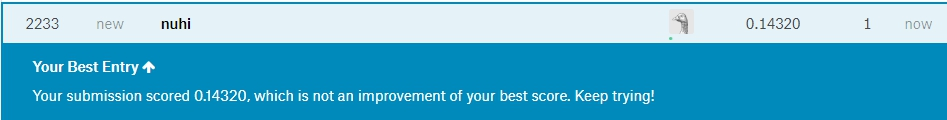

In [5]:
from IPython.display import Image
Image(filename="kaggle.jpg")